# Support Vector Regressor

- SVR aims to approximate a continuous function that maps input variables to a target variable.
- In SVR, the objective shifts to fitting as many data points as possible within a specified margin (epsilon, ε) while minimizing the margin violation. 
- This margin defines a range within which errors are tolerable, and points outside this margin contribute to the loss function.

**Loss Function Modification**
SVR employs a loss function that penalizes deviations from the predicted values based on a tolerance margin (epsilon, ε). Instances within the margin are not penalized, while instances outside the margin contribute to the loss proportionally to their distance from the margin. This epsilon-insensitive loss function allows SVR to handle outliers and focus on fitting most data within the specified tolerance.

**Hyperparameters - Epsilon (ε) and Regularization Parameter (C)**
SVR introduces two crucial hyperparameters – epsilon (ε) and regularisation parameter (C). Epsilon determines the margin width within which data points are correctly predicted. At the same time, regularisation parameter C controls the trade-off between achieving a small margin and minimising the training error.

**Margin and Support Vectors**
SVR seeks to fit as many data points within the margin (defined by ε) while minimising the margin violation. Data points lying exactly on the margin or within it are termed support vectors and heavily influence the construction of the regression model.

**Optimisation**
SVR optimises the margin and fitting error simultaneously, aiming to find the hyperplane that maximises the margin while ensuring that the deviations of predictions from actual values (residuals) are within the specified tolerance (ε).

Steps:
**1.Data Preprocessing:**
- Handle missing values: Impute or remove missing values from the dataset.
- Feature scaling: Normalise or standardise the features to ensure that all features contribute equally to the model.
- Feature selection: Identify and select relevant features that contribute most to the prediction task if necessary.
**2.Splitting the Dataset**: Divide the dataset into training and testing sets to evaluate the model’s performance on unseen data. Typical splits include 80% for training and 20% for testing.
**3.Model Initialisation**:
- Import the SVR class from the scikit-learn library.
- Choose the appropriate kernel function (e.g., Linear, RBF) based on the dataset and problem characteristics.
- Specify hyperparameters such as epsilon (ε) and regularisation parameter (C) based on domain knowledge or through hyperparameter tuning.
**4.Model Training**:
- Fit the SVR model to the training data using the fit() method.
- The model learns the optimal hyperplane that best fits the training data while minimising the margin violation.
**5.Model Evaluation**:
- Predict the target variable for the test dataset using the predict() method.
- Evaluate the model’s performance using appropriate regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R2) score.
- Visualise the predicted values against the actual values to assess the model’s accuracy and identify any patterns or discrepancies.
**6.Hyperparameter Tuning (Optional)**:
- Perform hyperparameter tuning using techniques like Grid Search or Random Search to find the optimal values for epsilon (ε), regularisation parameter (C), and kernel parameters.
- Use cross-validation to assess the model’s performance across different parameter combinations and avoid overfitting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [3]:
# Print dataset information
print(f"Dataset shape: {X.shape}")
print(f"Feature names: {housing.feature_names}")
print(f"Target description: {housing.DESCR.split('Attribute Information:')[1].split('Note')[0]}")


Dataset shape: (20640, 8)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target description: 
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Create and train the SVR model with different kernels
kernels = ['linear', 'poly', 'rbf']
svr_models = {}
results = {}

In [7]:
for kernel in kernels:
    # Create and train the SVR model
    svr = SVR(kernel=kernel, C=1.0, epsilon=0.1)
    svr.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = svr.predict(X_train_scaled)
    y_test_pred = svr.predict(X_test_scaled)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store the model and results
    svr_models[kernel] = svr
    results[kernel] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }

    print(f"\nKernel: {kernel}")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Testing MSE: {test_mse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Testing R²: {test_r2:.4f}")



Kernel: linear
Training MSE: 0.8974
Testing MSE: 0.5793
Training R²: 0.3287
Testing R²: 0.5579

Kernel: poly
Training MSE: 0.7051
Testing MSE: 1.0035
Training R²: 0.4725
Testing R²: 0.2342

Kernel: rbf
Training MSE: 0.3361
Testing MSE: 0.3570
Training R²: 0.7486
Testing R²: 0.7276


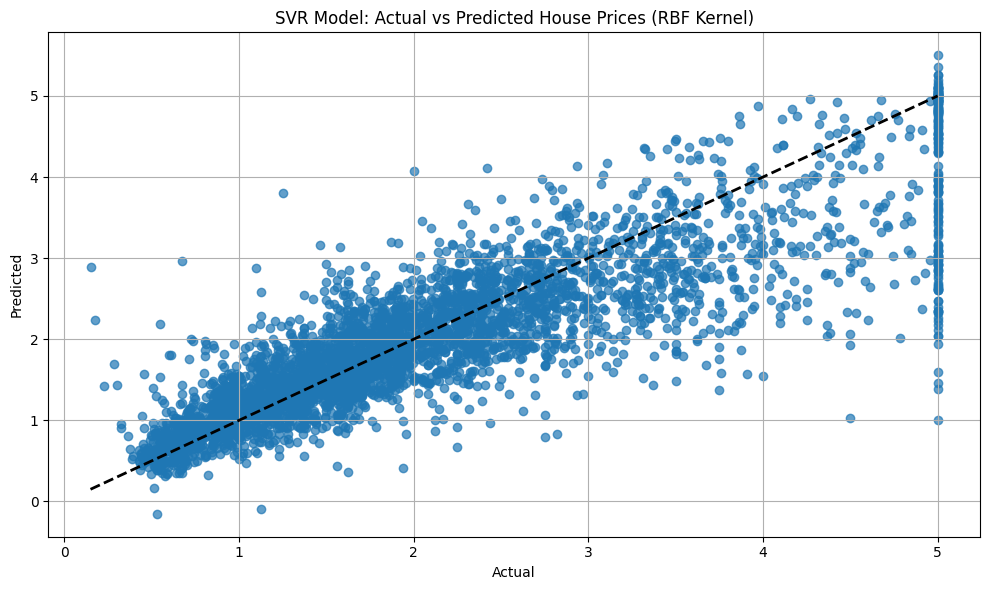

In [8]:
# Visualize the predictions vs actual values for the RBF kernel model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_models['rbf'].predict(X_test_scaled), alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR Model: Actual vs Predicted House Prices (RBF Kernel)')
plt.grid(True)
plt.tight_layout()
plt.show()


Feature Importance (Linear Kernel):
      Feature  Coefficient  Absolute Coefficient
0      MedInc     0.920677              0.920677
6    Latitude    -0.755606              0.755606
7   Longitude    -0.752688              0.752688
5    AveOccup    -0.641180              0.641180
3   AveBedrms     0.414981              0.414981
2    AveRooms    -0.372351              0.372351
1    HouseAge     0.088076              0.088076
4  Population     0.011017              0.011017


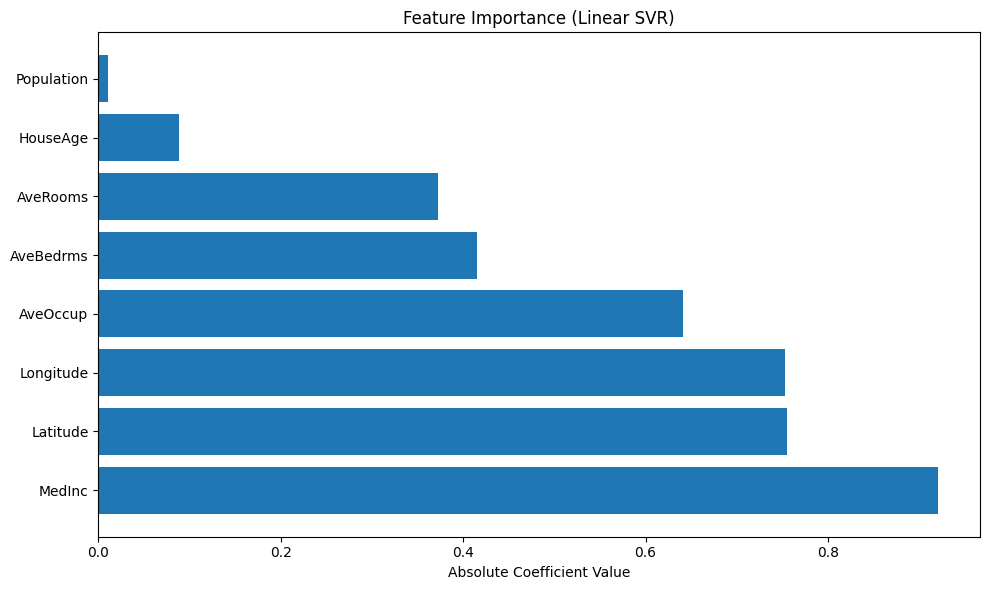

In [9]:
# Feature importance analysis (for linear kernel only)
if 'linear' in svr_models:
    feature_importance = pd.DataFrame({
        'Feature': housing.feature_names,
        'Coefficient': svr_models['linear'].coef_[0]
    })
    feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])
    feature_importance = feature_importance.sort_values('Absolute Coefficient', ascending=False)

    print("\nFeature Importance (Linear Kernel):")
    print(feature_importance)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Absolute Coefficient'])
    plt.xlabel('Absolute Coefficient Value')
    plt.title('Feature Importance (Linear SVR)')
    plt.tight_layout()
    plt.show()

In [10]:
# Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'auto', 'scale'],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}


In [11]:
# Create the grid search
grid_search = GridSearchCV(
    SVR(),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

In [ ]:
# Fit the grid search
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [ ]:

# Print the best parameters and score
print("\nGrid Search Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best MSE: {-grid_search.best_score_:.4f}")

In [ ]:
# Evaluate the best model
best_svr = grid_search.best_estimator_
y_test_pred = best_svr.predict(X_test_scaled)
best_test_mse = mean_squared_error(y_test, y_test_pred)
best_test_r2 = r2_score(y_test, y_test_pred)

In [ ]:
print(f"\nBest Model Performance:")
print(f"Test MSE: {best_test_mse:.4f}")
print(f"Test R²: {best_test_r2:.4f}")

# Tips and Tricks for Support Vector Regression

- Choose the Right Kernel Function
- Optimise Hyperparameters - epsilon (ε), regularisation parameter (C), and kernel parameters. Utilise techniques like grid or random search to explore the hyperparameter space efficiently
- Feature Scaling
- Handle Outliers
- Cross-Validation
- Regularisation - Adjust the regularisation parameter (C) to control the model complexity and training error trade-offs. Higher values of C result in a more complex model that may overfit the training data, while lower values encourage a simpler model with potentially higher bias.
- Ensemble Methods
- Feature Engineering - Explore feature engineering techniques to create meaningful and informative features that better capture the underlying relationships in the data. Feature transformation, interaction terms, and domain-specific knowledge can enrich the feature space and improve model performance.
- Regularize Kernel Functions - Adjust kernel parameters (e.g., gamma for the RBF kernel) to control the smoothness of decision boundaries and prevent overfitting. Regularising kernel functions can enhance model generalisation and avoid memorising noise in the data.




# Reference

- https://spotintelligence.com/2024/05/08/support-vector-regression-svr/